## Setup

In [1]:
import os
from copy import deepcopy
os.environ['CUDA_VISIBLE_DEVICES'] = ''

import numpy as np
import sklearn.decomposition
import matplotlib.pyplot as plt
from hdf5storage import loadmat, savemat

import torch
import torch.nn as nn
import torch.nn.functional as F

from api.preprocessing import sound2coch
from api.librispeech import LibriDataset
from api.model import SpeechRecognitionCTC

# CUDA for PyTorch
device = torch.device("cpu")
print(device)

cpu


## Define model

In [2]:
LibriDataset.set_mode('phoneme') # Should be one of 'grapheme', 'phoneme', 'word'
LibriDataset.set_spacing(True)

freq_bins = 65
size_vocab = LibriDataset.vocab_size()
print(f'Frequency dimension: {freq_bins}, alphabet size: {size_vocab}')

Frequency dimension: 65, alphabet size: 42


In [3]:
N_LAYER, N_NODES = 5, 500
model_id = f'{LibriDataset.MODE}-spaced-{N_LAYER}-{N_NODES}'
model_arch = dict(rnn_hidden_size=N_NODES, nb_layers=N_LAYER, window_size=10, rnn_stride=2)
model_name = 'models/model-ctc-{:s}'.format(model_id)

print(model_id)

phoneme-spaced-5-500


In [4]:
model = SpeechRecognitionCTC(rnn_type=nn.GRU, labels=LibriDataset.alphabet(), **model_arch, freq_bins=freq_bins)
model = model.to(device)

model.load_state_dict(torch.load(f'{model_name}.pt', map_location=device))
model.eval();

## Inferrence

# introducing speaker variability

In [5]:
'''

model.eval()
with torch.no_grad():
    xs = torch.Tensor(cochleagram).unsqueeze(0)
    xs = xs.type(torch.float32).to(device)
    xlen = torch.LongTensor([xs.shape[1]])
    z, zlen = model.predict(xs, xlen)
    
    zi = [_ for _ in z.squeeze().argmax(dim=1)]
    for i in range(len(zi)-1,0,-1):
        if zi[i] == zi[i-1]: zi = zi[:i-1] + zi[i:]
    zi = [alphabet[_] for _ in zi if _ > 0]
    
    zi = ['<SPACE>' if _ == LibriDataset.SYM_SPACE else _ for _ in zi]
    zi = ' '.join(zi)
    
    print(zi)
    print()
    
    activation = model.activations(xs)
    activation = [x.squeeze(0).numpy().astype('float32') for x in activation]
    # activation = [trans[layer].transform(activation[layer]) for layer in range(nb_layers)]

'''
import glob

alphabet = LibriDataset.alphabet()
maindir='./sounds/howto/'
nTrial=37
activation=[]
prediction=[]

actv=[]
pred=[]
#make a list of names
root_dir = os.getcwd()
os.chdir(maindir+'sounds/')
sounds_names = glob.glob('*.wav')
os.chdir(root_dir)
sounds_names=[nm[0:-4] for nm in sounds_names]
print( len(sounds_names))

for nm in sounds_names: 
    sound_file = maindir+'sounds/'+nm+'.wav'
    cochleagram = sound2coch(sound_file)
    prediction.append(model.get_prediction(cochleagram))
    activation.append(model.get_activation(cochleagram))

    
print((activation[0][0].shape)) # dimentions: trial, layer,time,neuron

    
    
    


564
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
h

In [6]:
print(prediction[0])

HH W EH N <SPACE> DH AH <SPACE> V EH T ER AH N EH R IY AH N Z <SPACE> IH N S T AO L D <SPACE> D IH M AY <SPACE> K R OW CH IH P <SPACE> D UW <SPACE> N AA T <SPACE> W ER IY <SPACE> AH <SPACE> AW T <SPACE> IH D <SPACE> HH ER T IH NG <SPACE> DH AH <SPACE> P AA P IY <SPACE> IH T <SPACE> T IH K AH L Z <SPACE> IH T <SPACE> R AE DH ER <SPACE> DH AE N <SPACE> HH ER T IH NG <SPACE> IH T


In [7]:
#loading phn 
from utils import load_data_5 # for bahah load data 6 for others load data 5
all_phn=[]
all_wrd=[]
name=maindir
for nm in sounds_names:
    phname, nphonemes, phonemes, wrdname, nwords, words= load_data_5(name, nm)
    all_phn.append(phonemes)
    all_wrd.append(words)

HowTo_f2_trl46.phn
HowTo_f2_trl52.phn
HowTo_m2_trl72.phn
HowTo_m2_trl66.phn
HowTo_m2_trl5.phn
HowTo_f2_trl85.phn
HowTo_m3_trl5.phn
HowTo_f2_trl91.phn
HowTo_f1_trl72.phn
HowTo_f1_trl66.phn
HowTo_m1_trl46.phn
HowTo_m1_trl52.phn
HowTo_m1_trl85.phn
HowTo_m1_trl91.phn
HowTo_m3_trl11.phn
HowTo_f3_trl19.phn
HowTo_f3_trl25.phn
HowTo_m3_trl39.phn
HowTo_f3_trl31.phn
HowTo_f2_trl1.phn
HowTo_f3_trl1.phn
HowTo_f3_trl30.phn
HowTo_m3_trl38.phn
HowTo_f3_trl24.phn
HowTo_f3_trl18.phn
HowTo_m3_trl10.phn
HowTo_m1_trl90.phn
HowTo_m1_trl84.phn
HowTo_m1_trl53.phn
HowTo_m1_trl47.phn
HowTo_f1_trl67.phn
HowTo_f1_trl73.phn
HowTo_m3_trl4.phn
HowTo_f2_trl90.phn
HowTo_f2_trl84.phn
HowTo_m2_trl4.phn
HowTo_m2_trl67.phn
HowTo_m2_trl73.phn
HowTo_f2_trl53.phn
HowTo_f2_trl47.phn
HowTo_m2_trl59.phn
HowTo_f2_trl51.phn
HowTo_f2_trl45.phn
HowTo_m2_trl65.phn
HowTo_m2_trl71.phn
HowTo_f2_trl79.phn
HowTo_f2_trl92.phn
HowTo_m3_trl6.phn
HowTo_f2_trl86.phn
HowTo_m2_trl6.phn
HowTo_f1_trl65.phn
HowTo_f1_trl71.phn
HowTo_m1_trl79.phn
H

HowTo_f2_trl9.phn
HowTo_f3_trl9.phn
HowTo_m3_trl19.phn
HowTo_f3_trl11.phn
HowTo_m3_trl25.phn
HowTo_m3_trl31.phn
HowTo_f3_trl39.phn
HowTo_f1_trl85.phn
HowTo_f1_trl91.phn
HowTo_m1_trl72.phn
HowTo_m1_trl66.phn
HowTo_f1_trl46.phn
HowTo_f1_trl52.phn
HowTo_m2_trl85.phn
HowTo_m2_trl91.phn
HowTo_m2_trl46.phn
HowTo_m2_trl52.phn
HowTo_f2_trl72.phn
HowTo_f2_trl66.phn
HowTo_f2_trl70.phn
HowTo_m2_trl78.phn
HowTo_f2_trl64.phn
HowTo_f2_trl58.phn
HowTo_m2_trl50.phn
HowTo_m2_trl87.phn
HowTo_m2_trl93.phn
HowTo_m1_trl58.phn
HowTo_f1_trl50.phn
HowTo_m1_trl70.phn
HowTo_f1_trl78.phn
HowTo_m1_trl64.phn
HowTo_f1_trl87.phn
HowTo_f1_trl93.phn
HowTo_m3_trl27.phn
HowTo_m3_trl33.phn
HowTo_f3_trl13.phn
HowTo_f3_trl12.phn
HowTo_m3_trl32.phn
HowTo_m3_trl26.phn
HowTo_f1_trl92.phn
HowTo_f1_trl86.phn
HowTo_m1_trl65.phn
HowTo_f1_trl79.phn
HowTo_m1_trl71.phn
HowTo_f1_trl51.phn
HowTo_m1_trl59.phn
HowTo_f1_trl45.phn
HowTo_m2_trl92.phn
HowTo_m2_trl86.phn
HowTo_m2_trl51.phn
HowTo_f2_trl59.phn
HowTo_m2_trl45.phn
HowTo_f2_trl65

# getting the activation prperrties of each phoneme for each neuron in all layers

In [8]:
# list of all phonemes in audios
phnlist=[]
for phonemes in all_phn:
    for phn in phonemes[0]:
        if phn[2][:2] not in phnlist:
            phnlist.append(phn[2][:2])
phnlist.remove('sp')
print(phnlist)
print(len(phnlist), len(phnlist)*3)


['HH', 'W', 'EH', 'N', 'DH', 'AH', 'V', 'T', 'R', 'IY', 'Z', 'IH', 'S', 'AO', 'L', 'M', 'AY', 'K', 'OW', 'CH', 'P', 'D', 'UW', 'AA', 'ER', 'B', 'AW', 'NG', 'AE', 'F', 'Y', 'UH', 'G', 'TH', 'EY', 'OY', 'SH', 'JH', 'ZH']
39 117


In [9]:
import numpy.matlib
from utils import padzeros

# for each phn and neuron we calculate the avg, std and tmax of actv for grouping them
actv_phn=np.zeros((N_LAYER,N_NODES, len(phnlist)*3)) 

#fig, axs = plt.subplots(len(SNRv), len(NumberStr),figsize=(25,25))
act_pat=[]
LLmax=-np.inf
for layr in range(N_LAYER):
    act_pattern=[]
    for neuron in range(N_NODES):
        time_course=[]
        for phnid, phn in enumerate(phnlist):
            count=0
            Lmax=-np.inf
            phnAct=np.array([0])
            for trl, phonemes in enumerate(all_phn):
                st=[np.round(idd[0]*100).astype('int') for idd in phonemes[0] if idd[2][:2]==phn]
                ft=[np.round(idd[1]*100).astype('int') for idd in phonemes[0] if idd[2][:2]==phn]
                #print('#',len(st))
                #print(phn)
                if len(st)>0:
                    L=np.amax(np.array(ft)-np.array(st))+1
                    if L>Lmax:
                        Lmax=L
                    act_inst=[padzeros(activation[trl][layr][st[idd]:ft[idd]+1,neuron], Lmax) for idd in range(len(st)) ]
                    sumact=sum(act_inst)
                    phnAct=padzeros(phnAct,Lmax)+sumact
                    count=count+len(st)
            phnAct=phnAct/count
            #print('activity', phnAct)
            if len(phnAct)>LLmax:
                LLmax=len(phnAct)
            time_course.append(phnAct)
            phnavg=np.mean(phnAct)
            #print('avg',phnavg, phnid)
            phnstd=np.std(phnAct)
            phntmax=np.argmax(phnAct)
            actv_phn[layr,neuron, phnid]=phnavg
            actv_phn[layr,neuron, phnid+len(phnlist)]=phnstd
            actv_phn[layr,neuron, phnid+len(phnlist)*2]=phntmax
        act_pattern.append(time_course)
    act_pat.append(act_pattern)


        
                

In [10]:
# finding avrg phn activity for each layer
phone_layer=np.zeros((N_LAYER, len(phnlist),LLmax))     
for layr in range(N_LAYER):
    for phnid, phn in enumerate(phnlist):
        phnPat=[act_pat[layr][idd][phnid] for idd in range(N_NODES)]
        phnPat=sum(phnPat)/N_NODES
        #   if layr==2:
        #       print(phnPat, len(phnPat))
        phone_layer[layr,phnid,:]=padzeros(phnPat, LLmax)

[16, 26, 35, 2, 17, 27, 33, 0, 14, 22, 1, 29, 10, 12, 13, 23, 19, 24, 28, 30, 9, 34, 18, 37, 6, 4, 7, 8, 5, 11, 21, 3, 25, 20, 32, 31, 36, 15, 38]
[19, 16, 6, 18, 2, 1, 8, 14, 25, 4, 3, 0, 7, 20, 21, 11, 32, 5, 22, 33, 29, 9, 23, 10, 15, 12, 30, 17, 13, 28, 24, 26, 27, 36, 31, 38, 35, 37, 34]
[18, 9, 13, 0, 2, 10, 22, 12, 23, 14, 24, 28, 34, 4, 5, 6, 7, 11, 8, 3, 20, 21, 32, 31, 17, 1, 27, 29, 25, 30, 36, 37, 19, 16, 15, 33, 35, 38, 26]
[37, 9, 20, 13, 0, 4, 32, 7, 1, 2, 27, 25, 29, 17, 34, 11, 5, 12, 30, 15, 6, 8, 18, 23, 16, 31, 3, 33, 10, 14, 26, 36, 35, 28, 21, 24, 38, 19, 22]
[0, 3, 7, 1, 20, 32, 8, 6, 5, 4, 11, 21, 31, 25, 12, 13, 23, 19, 9, 34, 18, 14, 2, 17, 27, 29, 10, 33, 30, 22, 28, 24, 37, 36, 15, 16, 26, 35, 38]


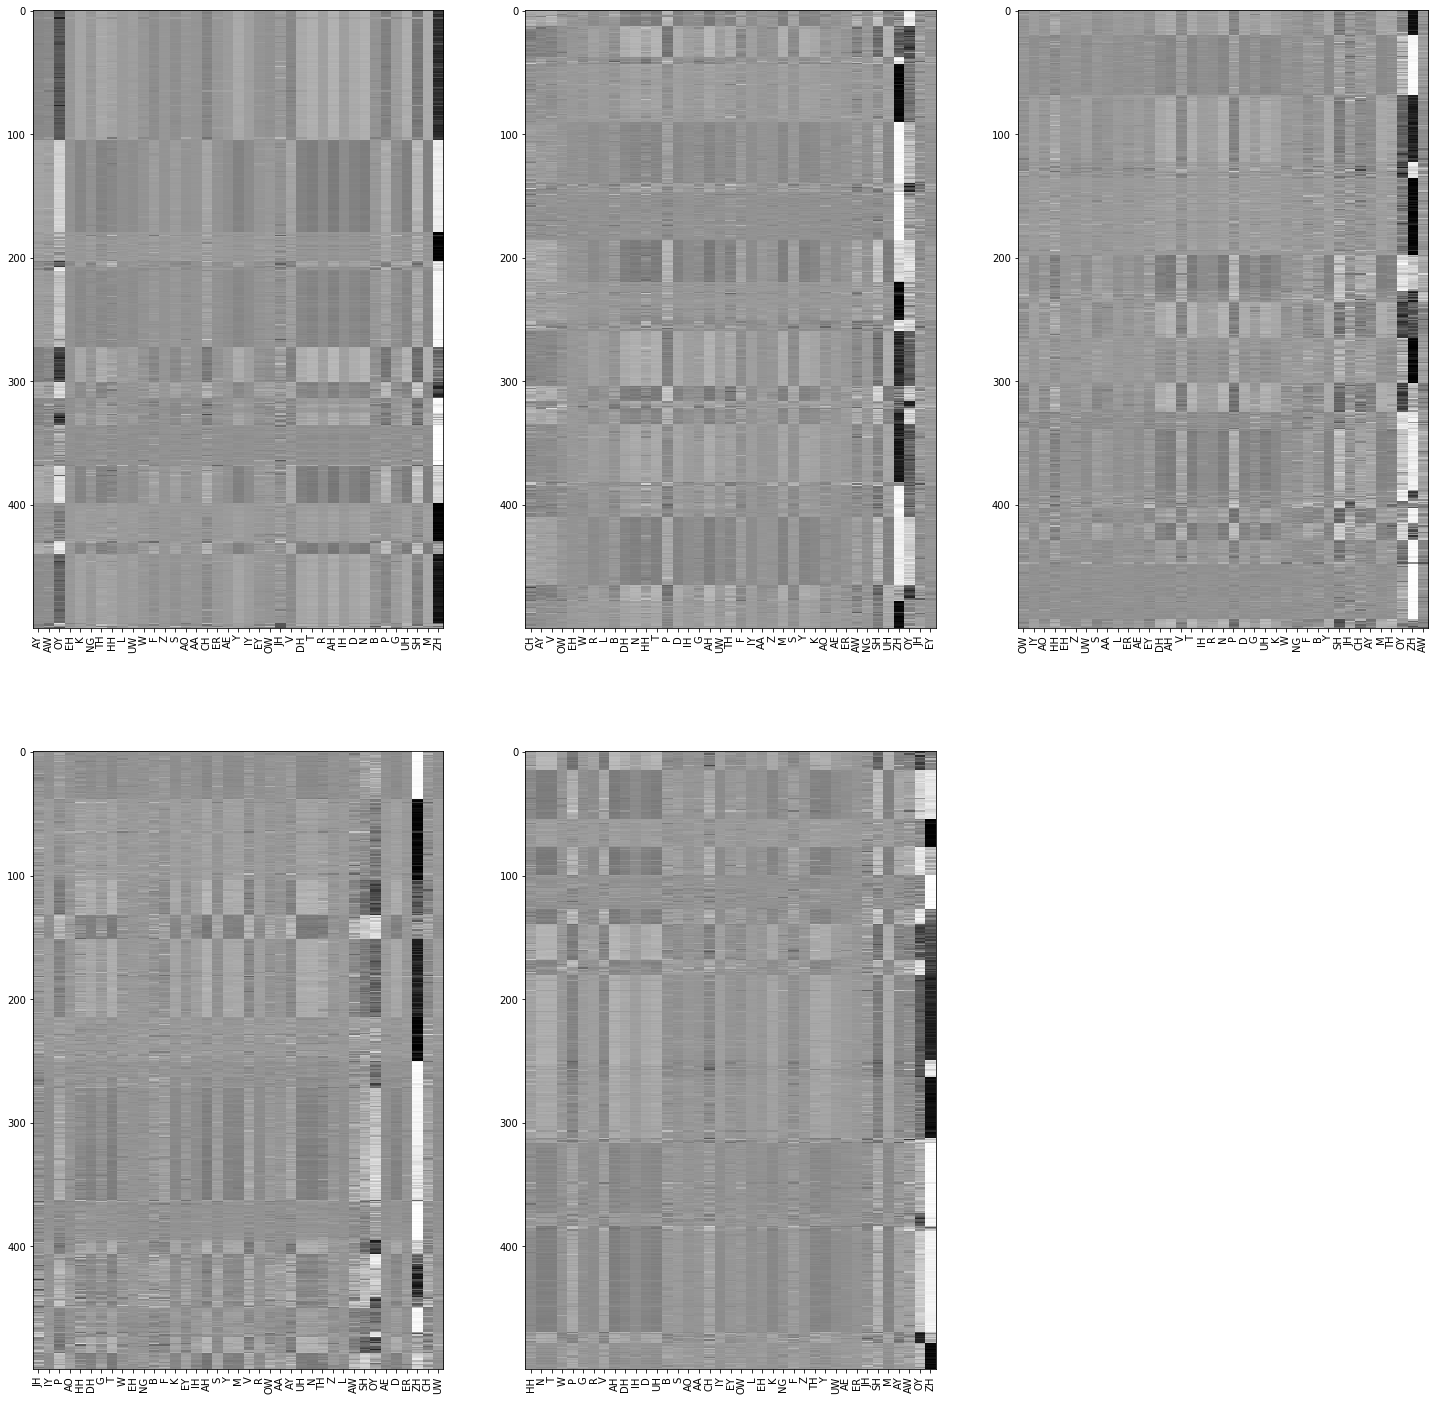

In [17]:
from sklearn.cluster import KMeans
from scipy import stats
from scipy.spatial import distance
kmeansOn=1
nC=20
thr= 0.3 # corelarion threshold fo clustering phonemes
thrD= 1 #distance threshold for clustering neurons
kmeans = KMeans(n_clusters=nC, random_state=0)
fig = plt.figure(figsize=(25,25))
for layr in range(N_LAYER):
    
    X=np.squeeze(actv_phn[layr,:,0*len(phnlist):1*len(phnlist)])
    #X=stats.zscore(X,axis=0)
    X=stats.zscore(X,axis=1)
    
    if kmeansOn==1:
        Y=kmeans.fit_predict(X)
        idd=np.arange(X.shape[0])
        yx=zip(Y,idd)
        yx=sorted(yx)
        newRows=[idd[1] for idd in yx]
    else:
        DD=distance.cdist(X, X, 'euclidean')
        C_N=[[idd] for idd in range(DD.shape[0])] # Cluster of neurons
        VthrD= thrD*np.amax(DD)
        condition=1
        while condition==1:
            i,j=np.unravel_index(np.argmin(DD), DD.shape)
            if i==j:
                DD[i,j]=np.inf
            else:
                if i>j:
                    ij=j
                    j=i
                    i=ij
                addi=i#[ idd for idd, c in enumerate(C_N) if i in c]
                addj=j#[ idd for idd, c in enumerate(C_N) if j in c]
                if addi!=addj:
                    C_N[addi]=C_N[addi]+C_N[addj]
                    C_N.pop(addj)
                XXP= np.array([ np.mean(X[idd,:], axis=0) for idd in C_N])
                DD=distance.cdist(XXP, XXP, 'euclidean')
                if len(C_N)==1:
                    condition=0
                    
        newRows=[]
        for sublist in C_N:
            newRows+=sublist        
        
    #print(newRows)
    
    # clustering phonemes with corelation:
    Z=np.corrcoef(np.squeeze(phone_layer[layr, :,:]))
    C=[[idd] for idd in range(Z.shape[0])]
    while np.amax(Z)>thr:
        i,j=np.unravel_index(np.argmax(Z), Z.shape)
        if j>i:
            addi=[ idd for idd, c in enumerate(C) if i in c]
            addj=[ idd for idd, c in enumerate(C) if j in c]
            if addi!=addj:
                C[addi[0]]=C[addi[0]]+C[addj[0]]
                C.pop(addj[0])
        Z[i,j]=-np.inf
    newCols=[]
    for sublist in C:
        newCols+=sublist
    Xn=X[newRows,:]
    Xnn=Xn[:,newCols]
    print(newCols)
    newphnlist=[phnlist[idd] for idd in newCols]
    ax = fig.add_subplot(2,3 , layr+1)
    #Xnn=stats.zscore(Xnn, axis=1)
    ax.imshow(Xnn,vmin=np.amin(Xnn), vmax=np.amax(Xnn), cmap='Greys', aspect='auto')
    plt.xticks(range(len(phnlist)),newphnlist, rotation='vertical')
    #plt.yticks(range(N_NODES),newRows, rotation='horizontal')
    
    
    
    

In [12]:
print(phonemes[0][0][2])
print(phnlist.index(phonemes[0][1][2][:2]))

sp
28


In [13]:
a=np.array([[0, 1,2,3,4],
          [0,10,20,30,40]])
b=a[:,[4,3,1,0,2]]
print(b)

[[ 4  3  1  0  2]
 [40 30 10  0 20]]


# LDA feature reduction to nph features for each layer for each phoneme instanse

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# creating dataset: phn*neuron
phnInstX=[[]]*N_LAYER
phnInstY=[]
for trl, phonemes in enumerate(all_phn):
    for phn in phonemes[0]:
        if phn[2][:2]!='sp':
            if len(phnInstY)==0:
                phnInstY=[phnlist.index(phn[2][:2])]
            else:
                phnInstY=np.vstack((phnInstY,phnlist.index(phn[2][:2])))  
            for layr in range(N_LAYER):
                # calculating the activation of this phoneme for all neurons:
                st=np.round(phn[0]*100).astype('int')
                ft=np.round(phn[1]*100).astype('int')
                NrnAct=[np.mean(activation[trl][layr][st:ft+1,neuron]) for neuron in range(N_NODES)]
                if len(phnInstX[layr])==0:
                    phnInstX[layr]=np.array(NrnAct)
                else:
                    phnInstX[layr]=np.vstack((phnInstX[layr],np.array(NrnAct)))


/Users/alizare/opt/anaconda3/envs/envTF113/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/alizare/opt/anaconda3/envs/envTF113/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


In [15]:
# reducing demention to K-1 by LDA:
lda=LDA(n_components=len(phnlist)-1)
phnInst=[[]]*N_LAYER
for layr in range(N_LAYER):
    phnInst[layr]=lda.fit_transform(phnInstX[layr], np.ndarray.flatten(phnInstY))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
# using tsne to vizualize:
from sklearn.manifold import TSNE
import pandas as pd

tsne=TSNE(n_components=2)

fig = plt.figure(figsize=(25,25))

for layr in range(N_LAYER):
    X = phnInst[layr]
    Xn = tsne.fit_transform(X)
    ax = fig.add_subplot(2,3 , layr+1)
    #ax.scatter(Xn[:,0].T, Xn[:,1].T,marker='o')
    labels = [phnlist[idd[0]] for idd in phnInstY]
    df = pd.DataFrame(dict(x=Xn[:,0].T, y=Xn[:,1].T, label=labels))

    groups = df.groupby('label')
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    for name, group in groups:
        ax.plot(group.x, group.y, marker='.', linestyle='', ms=5, label=name)
        ax.legend()

# looking at the f ratios for each phoneme values

In [ ]:
import scipy.stats as stats
a=np.array([[1,2,3,4], [1,2,3,4]])
print(a)
print(stats.zscore(a,axis=1))

In [ ]:
# calculating the F_ratio for each phn at each layer between that phn and all other phonemes:

f_ratio=np.zeros((N_LAYER, len(phnlist)))
f_ratio_tot=np.zeros((N_LAYER, 1))
Y=np.ndarray.flatten(phnInstY)
for layr in range(N_LAYER):
    X=np.array(phnInst[layr])
    # the mean value of each cluster:
    A=0
    B=0
    Center=np.mean(X,axis=0)
    N=np.shape(X)[0]
    for clust in range(len(phnlist)):
        x=X[Y==clust,:]
        xP=X[Y!=clust,:]
        center=np.mean(x, axis=0)
        centerP=np.mean(xP, axis=0)
        n=np.shape(x)[0]
        a=n*(np.linalg.norm(center-Center))**2+(N-n)*(np.linalg.norm(centerP-Center))**2 #between class seperation
        b= np.sum(np.linalg.norm(x-center, axis=1)**2)+np.sum(np.linalg.norm(xP-centerP, axis=1)**2)
        f_ratio[layr, clust]=a/(b/(N-2))
        A+=n*(np.linalg.norm(center-Center))**2
        B+=np.sum(np.linalg.norm(x-center, axis=1)**2)
    f_ratio_tot[layr]=(A/(len(phnlist)-1))/(B/(N-len(phnlist)))
    
        
    


In [ ]:
z_f_r=stats.zscore(f_ratio, axis=0)
values = [1, 10, 100]

plt.figure(figsize=(12, 3))

plt.subplot(131)
plt.plot(f_ratio_tot)
plt.xlabel('layer')
plt.ylabel('total f_ratio')
plt.subplot(132)
for i in range(len(phnlist)):
    plt.plot(f_ratio[:,i])
plt.xlabel('layer')
plt.ylabel('per phoneme f_ratio')

plt.subplot(133)
plt.errorbar(np.arange(N_LAYER), np.mean(z_f_r, axis=1),
             yerr=np.std(z_f_r, axis=1)/np.sqrt(np.shape(z_f_r)[1]),label ='Line1')
plt.xlabel('layer')
plt.ylabel('avg per phoneme f_ratio')
plt.suptitle('f_ratio')
plt.show()

In [ ]:
#is the improvement for phns from layer 1 to layer 2 significant?
layer_ref=0
layer_test=1
temp=stats.ttest_ind(z_f_r[layer_ref,:], z_f_r[layer_test,:], equal_var = False)
print( 'the p-value of change for layer ', layer_ref, ' to layer ', layer_test,' is ', temp[1])

In [ ]:
# for phn grouping:

plt.figure(figsize=(12, 5))
ref_layer=0
thr= 0.3
Z=np.corrcoef(np.squeeze(phone_layer[ref_layer, :,:]))
C=[[idd] for idd in range(Z.shape[0])]
while np.amax(Z)>thr:
    i,j=np.unravel_index(np.argmax(Z), Z.shape)
    if j>i:
        addi=[ idd for idd, c in enumerate(C) if i in c]
        addj=[ idd for idd, c in enumerate(C) if j in c]
        if addi!=addj:
            C[addi[0]]=C[addi[0]]+C[addj[0]]
            C.pop(addj[0])
    Z[i,j]=-np.inf
newCols=[]
for sublist in C:
    newCols+=sublist
newphnlist=[phnlist[idd] for idd in newCols]
z_f_rOrdered=z_f_r[:,newCols]
plt.imshow(z_f_rOrdered,vmin=-2, vmax=2, cmap='Greys', aspect='auto')
plt.xticks(range(len(phnlist)),newphnlist, rotation='vertical')
        